# Exp: 7- Logistic Regression

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
 
data = sklearn.datasets.fetch_openml("diabetes", version=1, as_frame=True, return_X_y=False)
data = data["frame"]
print(data)

     preg   plas  pres  skin   insu  mass   pedi   age            class
0     6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  tested_positive
1     1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  tested_negative
2     8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  tested_positive
3     1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  tested_negative
4     0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  tested_positive
..    ...    ...   ...   ...    ...   ...    ...   ...              ...
763  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63.0  tested_negative
764   2.0  122.0  70.0  27.0    0.0  36.8  0.340  27.0  tested_negative
765   5.0  121.0  72.0  23.0  112.0  26.2  0.245  30.0  tested_negative
766   1.0  126.0  60.0   0.0    0.0  30.1  0.349  47.0  tested_positive
767   1.0   93.0  70.0  31.0    0.0  30.4  0.315  23.0  tested_negative

[768 rows x 9 columns]


In [6]:
#Converting  catagorcal class into numerical value
data['class'].replace(['tested_positive', 'tested_negative'],
                        [1, 0], inplace=True)


In [7]:
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [8]:
print("Shape:", data.shape)
data.isnull().sum()

Shape: (768, 9)


preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
X=data.loc[:,["preg","plas", "pres","skin","insu","mass","pedi","age"]]
Y=data.loc[:,["class"]]

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state = 123)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1).fit(X_train, y_train)
y_pred=clf.predict(X_test)

/home/parth/anaconda3/envs/tfenv/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/parth/anaconda3/envs/tfenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
clf.predict_proba(X_test)

array([[0.1433398 , 0.8566602 ],
       [0.68256504, 0.31743496],
       [0.34581242, 0.65418758],
       [0.94421551, 0.05578449],
       [0.91986362, 0.08013638],
       [0.36459965, 0.63540035],
       [0.10287776, 0.89712224],
       [0.47468269, 0.52531731],
       [0.38201016, 0.61798984],
       [0.69899789, 0.30100211],
       [0.13456395, 0.86543605],
       [0.81155226, 0.18844774],
       [0.87996909, 0.12003091],
       [0.75171552, 0.24828448],
       [0.15818717, 0.84181283],
       [0.96041478, 0.03958522],
       [0.75206451, 0.24793549],
       [0.92514771, 0.07485229],
       [0.94515118, 0.05484882],
       [0.60126586, 0.39873414],
       [0.30473822, 0.69526178],
       [0.79891317, 0.20108683],
       [0.71647584, 0.28352416],
       [0.05984627, 0.94015373],
       [0.04998388, 0.95001612],
       [0.8822916 , 0.1177084 ],
       [0.93691134, 0.06308866],
       [0.72987992, 0.27012008],
       [0.60036677, 0.39963323],
       [0.12206739, 0.87793261],
       [0.

In [13]:
clf.score(X_train, y_train)

0.7746741154562383

In [24]:
#Performance matrix
from sklearn import metrics
meanAbErr= metrics.mean_absolute_error(y_test,y_pred)
meanSqErr=metrics.mean_squared_error(y_test,y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqErr)

Accuracy: 0.7965367965367965
Precision: 0.7808219178082192
Recall: 0.6477272727272727
Mean Absolute Error:  0.20346320346320346
Mean Square Error:  0.20346320346320346
Root Mean Square Error:  0.4510689564392605


In [16]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[127,  16],
       [ 31,  57]])

Text(0.5, 257.44, 'Predicted label')

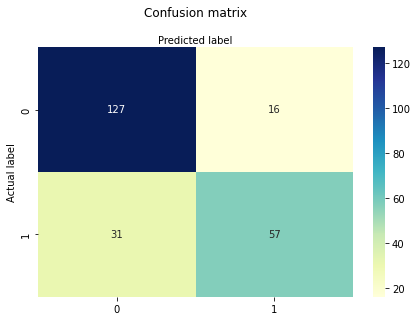

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

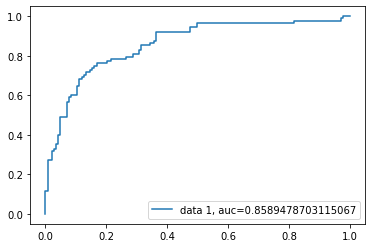

In [19]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()